SO: 401k index: 0
SO: roth index: 1
SO: savings index: 2
SO: stocks index: 3
Salary: 0
Rent: 2744.4560349060093
Base cost of living: 1047.8832133277474


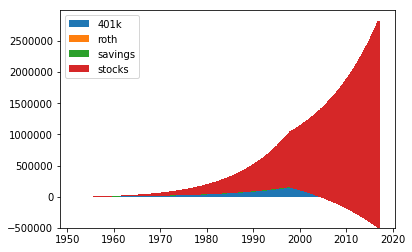

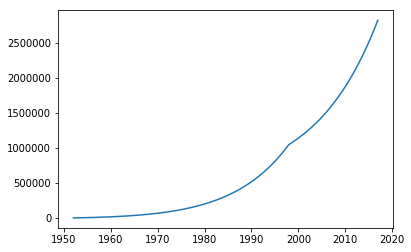

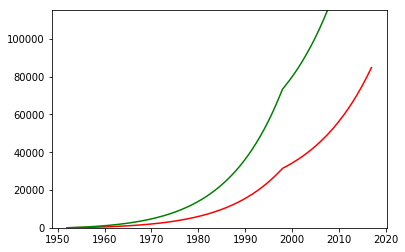

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import random 

plt.clf()

own_home = False 
home_paid_off = False

savings = 0
roth_ira = 0
my_401k = 0
stocks = 0

# 1.062 wage inflation per year 
# av_return = 0.00288 # Per paycheck, compounded, makes 7% a year. 
# av_return = 0.004 # Per paycheck, compounded, makes 10% a year.

def av_return():
    return  0.00288
#     rand_return = [0.01288, 0.00288, -0.00712]
#     return random.choice(rand_return)

house_price = 450000

years = 65 
paydates = years * 24 

salary_after_tax = 3000 
paycheck = salary_after_tax/24 

rent = 55
mortgage = 1200 
base = 21

def living_expenses(): 
    if (own_home and not (home_paid_off)):
        return base + mortgage 
    elif own_home and home_paid_off:
        return base 
    else:
        return base + rent 


roth_contribution = 0 #5500/24
my_401k_contribution = paycheck * 0.15

def expenses():
    return living_expenses() + roth_contribution + my_401k_contribution
    
        
df_dict = {
    'roth': [],
    '401k': [],
    'savings': [],
    'stocks': []
}
df_index = []
for paydate in range(paydates):
    padding = paycheck * 6
    if paydate % 24 == 0:
        if paydate <= (45 * 24): # Before retirement
            paycheck = paycheck * 1.062 # Makes 1.062 per year, or canadian wage inflation between 1952 - 1997
        else: 
            paycheck = 0
        rent = rent * 1.062
        base = base * 1.062
    roth_ira = float(roth_ira * (1+av_return() ))
    my_401k = float(my_401k * (1+av_return() ))
    stocks = float(stocks * (1+av_return() ))
    savings = float((savings + (paycheck - expenses())))
    roth_ira += roth_contribution
    my_401k += my_401k_contribution
#     if (savings >= house_price * 0.3) and (own_home == False):
#         savings -= house_price * 0.25
#         own_home = True
    if (savings >= padding ):
        extra = (savings - padding)
        stocks += extra
        savings = padding
        
    df_index.append(paydate)
    df_dict['roth'].append(roth_ira)
    df_dict['401k'].append(my_401k)
    df_dict['savings'].append(savings)
    df_dict['stocks'].append(stocks)
    

df = pd.DataFrame(data=df_dict)

sol = list(df)
plot_df = df.transpose()
pay_check_list = list(plot_df)
x_axis = list(map(lambda x: x/24 + 1952, pay_check_list))

bottoms = [0]

for index, saving_option in enumerate(sol):
    print('SO: ' + saving_option + ' index: ' + str(index))
    last_bottom = bottoms[index]
    bottoms.append(df[saving_option] + last_bottom)
print("Salary: " + str(paycheck*24))
print("Rent: " + str(rent))
print("Base cost of living: "+ str(base))


handles = []
for index, saving_option in enumerate(sol):
    plot = plt.bar(x_axis, df[saving_option], 0.5, bottom=bottoms[index], label=saving_option)
    handles.append(plot)
    
plt.legend(handles=handles)
plt.figure(figsize=(18, 16))
plt.show()


plt.clf()
df['total'] = df.sum(axis=1)
plt.plot(x_axis, df['total'])
plt.show()

plt.clf()
df['earning_power'] = df['total'] * 0.03
df['earning_power_2'] = df['total'] * 0.07
plt.plot(x_axis, df['earning_power'], color='red')
plt.plot(x_axis, df['earning_power_2'], color='green')
axes = plt.gca()
axes.get_xaxis().get_major_formatter().set_useOffset(False)
axes.set_ylim([0,115000])
plt.show()
